In [22]:
import pandas as pd

%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt

from math import ceil


# The Data

In [23]:
df = pd.read_csv("../Data/Staff_Size/Onboard_By_station_By_FY.csv").head(1).drop("ORGANIZATION",1).drop("ID",1)
df

MAY-FY11  MAY-FY12  MAY-FY13  MAY-FY14  MAY-FY15  MAY-FY16
0    268699  272538.0    283338    294444    307430    318560

# How has staffing changed?

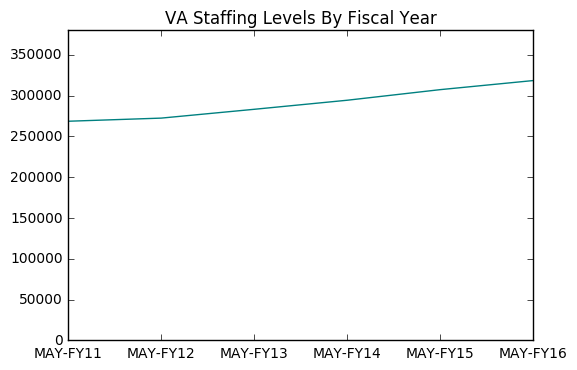

In [24]:
ax = df.transpose().plot(kind="line", color="teal")
ax.set_ylim(0,380000)
ax.set_title("VA Staffing Levels By Fiscal Year")
ax.legend_.remove()


## It looks like there's a pretty steady increase...but what happens when we subtract the choice hires? We should see a steady increase without choice hires since they should have been on top of usual hires

In [25]:
choice_hires = pd.read_csv("../Data/Hiring/Hiring_Clean_All_Positions.csv")

In [26]:
percent_increase_dict = {}

choice_hires_total = choice_hires["NbrEmps"].sum()

MAY_FY16_no_choice_hires = df["MAY-FY16"] - choice_hires_total

percent_increase_dict["11-13"] = (df["MAY-FY13"] - df["MAY-FY11"])/df["MAY-FY11"]
percent_increase_dict["12-14"] = (df["MAY-FY14"] - df["MAY-FY12"])/df["MAY-FY12"]
percent_increase_dict["13-15"] = (df["MAY-FY15"] - df["MAY-FY13"])/df["MAY-FY13"]
percent_increase_dict["14-16"] = (df["MAY-FY16"] - df["MAY-FY14"])/df["MAY-FY14"]
percent_increase_dict["14-16 No Choice Hires"] = (MAY_FY16_no_choice_hires - df["MAY-FY14"])/df["MAY-FY14"]

percent_increase = pd.DataFrame.from_dict(percent_increase_dict)
percent_increase

11-13     12-14     13-15     14-16  14-16 No Choice Hires
0  0.054481  0.080378  0.085029  0.081904               0.040103

In [27]:
choice_hires_total

12308

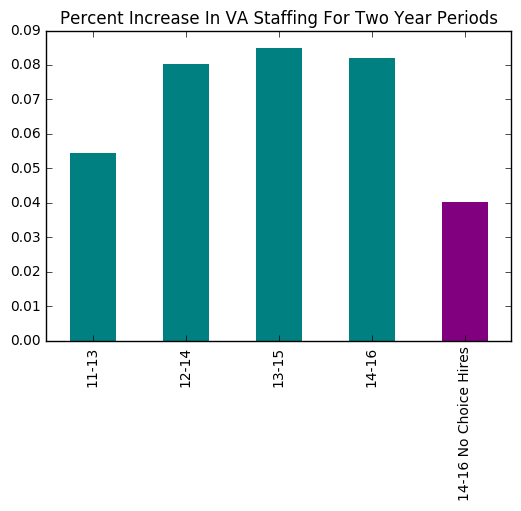

In [28]:
ax = percent_increase.transpose().plot(kind="bar",color = ["teal","teal","teal","teal","purple"], edgecolor="none")
ax.set_title("Percent Increase In VA Staffing For Two Year Periods")
ax.legend_.remove()


In [29]:
increase_dict = {}



increase_dict["11-13"] = (df["MAY-FY13"] - df["MAY-FY11"])
increase_dict["12-14"] = (df["MAY-FY14"] - df["MAY-FY12"])
increase_dict["13-15"] = (df["MAY-FY15"] - df["MAY-FY13"])
increase_dict["14-16"] = (df["MAY-FY16"] - df["MAY-FY14"])
increase_dict["14-16 No Choice Hires"] = (MAY_FY16_no_choice_hires - df["MAY-FY14"])

increase = pd.DataFrame.from_dict(increase_dict)
increase

11-13    12-14  13-15  14-16  14-16 No Choice Hires
0  14639  21906.0  24092  24116                  11808

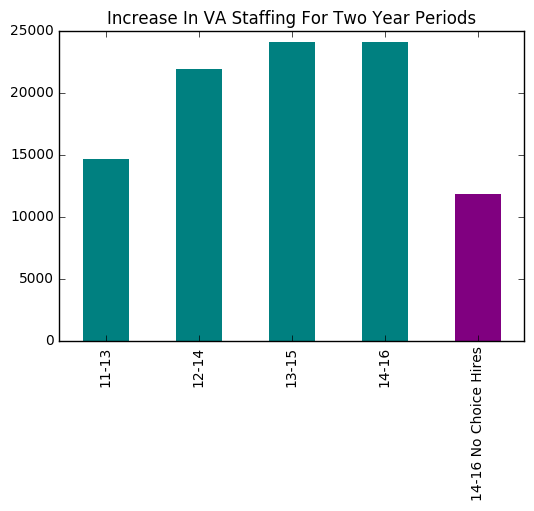

In [30]:
ax = increase.transpose().plot(kind="bar",color = ["teal","teal","teal","teal","purple"], edgecolor="none")
ax.set_title("Increase In VA Staffing For Two Year Periods")
ax.legend_.remove()

11-13    12-14  13-15  14-16  14-16 No Choice Hires
0  14639  21906.0  24092  24116                  11808

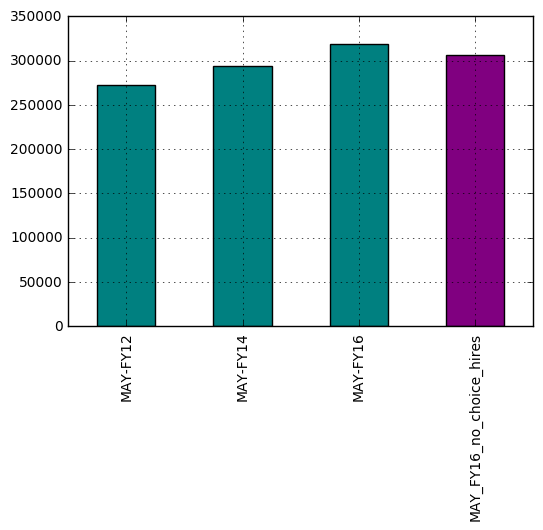

In [31]:
df["MAY_FY16_no_choice_hires"] = MAY_FY16_no_choice_hires

ax = df[["MAY-FY12","MAY-FY14","MAY-FY16","MAY_FY16_no_choice_hires"]].transpose().plot(kind='bar',color=['teal','teal','teal','purple'])
ax.legend_.remove()

ax.grid()

### Staffing level increases slowed down slightly between 2014 and 2016, even before you add in the choice hires. Without the choice hires, it's even worse. 

# Local Level

In [32]:
master = pd.read_csv("../Data/Master/Master.csv")
master.head()

Appts_Pending_1412  %_Appts_Over_30_Pending_1412  PC_Wait_Pending_1412  \
0               42899                          2.70                  2.51   
1               23709                          2.16                  3.92   
2                8105                          5.17                  1.12   
3               85625                          1.71                  1.66   
4               19511                          2.64                  2.66   

   SC_Wait_Pending_1412  MH_Wait_Pending_1412 for_dups  \
0                  4.07                  2.77      402   
1                  3.95                  0.79      405   
2                 10.53                  4.41      518   
3                  3.53                  3.92      523   
4                  4.21                  5.13      608   

                        ORGANIZATION  MAY-FY11  MAY-FY12  MAY-FY13  \
0           (V01) (402) HCS TOGUS ME    1293.0    1272.0    1248.0   
1  (V01) (405) MROC WHT RIVER JCT VT     852.0     853.0     881.0   
2          (V01) (518) MC BEDFORD MA    1313.0    1265.0    1245.0   
3          (V01) (523) HCS BOSTON MA    4022.0    4011.0    4041.0   
4       (V01) (608) MC MANCHESTER NH     663.0     683.0     691.0   

         ...         MH_Wait_Complete_Increase_%  Staff_To_Appts_Pending_14  \
0        ...                           30.769231                  33.436477   
1        ...                           57.142857                  25.742671   
2        ...                          -79.291553                   6.478817   
3        ...                          -17.490494                  21.236359   
4        ...                           -2.325581                  28.441691   

   Staff_To_Appts_Pending_16 Staff_To_Appts_Complete_14  \
0                  30.158368                  19.063133   
1                  17.919286                  20.881650   
2                  10.692308                   9.573141   
3                  19.607948                  11.326637   
4                  31.661270                  25.679300   

   Staff_To_Appts_Complete_16  Percentage_Point_Wait_Over_30_Increase_Pending  \
0                   19.836100                                            1.48   
1                   18.335599                                            1.67   
2                    9.741124                                            2.37   
3                   10.761329                                            2.72   
4                   23.473225                                            1.45   

   Percentage_Point_Wait_Over_30_Increase_Complete  State  \
0                                            -0.33     ME   
1                                             0.19     VT   
2                                            -0.44     MA   
3                                             1.66     MA   
4                                            -0.03     NH   

                       Name  qualitative_size  
0                 TOGUS, ME           average  
1  WHITE RIVER JUNCTION, VT           average  
2               BEDFORD, MA           average  
3         VA BOSTON HCS, MA             large  
4            MANCHESTER, NH             small  

[5 rows x 87 columns]

In [33]:

# Let's only look at locations that said they saw an increase in staff
staff_increased = master[master["Staff_14_To_16_Increase_%"] >0]

# Choice Staff Diff represents the increase in staff size from 2014 to 2016, minus 
staff_increased[staff_increased["Choice_Staff_Dif"] < 0]

Appts_Pending_1412  %_Appts_Over_30_Pending_1412  PC_Wait_Pending_1412  \
8                 31376                          3.16                  2.33   
14                40291                          4.10                  1.53   
19                29386                          1.67                  3.21   
20                24169                          1.41                  0.32   
21                24461                         13.33                 10.03   
23                12514                          6.11                 10.22   
25                61615                          9.30                  5.44   
27                23986                          3.03                  4.59   
28                51989                          8.19                 12.39   
30                41268                          5.89                  7.91   
35                34621                          4.61                  8.65   
57                57905                          2.88                  2.56   
61                39991                          3.97                  1.74   
68                37203                          1.96                  0.76   
74                10720                          5.68                  4.82   
86                49790                         16.61                 14.80   
101                7137                          4.92                  7.11   
114               73666                          6.91                 12.99   
118                8025                          9.26                  5.40   
125               26049                         10.87                 10.28   
131               80701                          9.95                  6.46   
139               31130                          3.69                  2.82   

     SC_Wait_Pending_1412  MH_Wait_Pending_1412 for_dups  \
8                    3.64                  4.29    528al   
14                   6.65                  2.03      561   
19                   5.66                  1.78      503   
20                   7.49                  0.69      529   
21                  14.74                  7.81      540   
23                   7.94                  0.33      562   
25                  14.91                  5.41      642   
27                   2.00                  3.00      693   
28                   7.70                  3.93      512   
30                   6.31                  8.83      688   
35                   6.05                  4.15      637   
57                   4.16                  4.20      614   
61                   6.19                  1.83      539   
68                   2.34                  0.47      553   
74                   7.46                  4.31      585   
86                  17.25                 10.91      520   
101                  6.33                  8.10      519   
114                  8.81                  1.87      648   
118                 17.48                  3.52      687   
125                 14.19                  3.37      654   
131                 13.35                  4.53      691   
139                  5.62                  6.28      656   

                         ORGANIZATION  MAY-FY11  MAY-FY12  MAY-FY13  \
8          (V02) (479) V2HCNALBANY NY      22.0      48.0      55.0   
14     (V03) (561) HCS EAST ORANGE NJ    2795.0    2762.0    2820.0   
19          (V04) (503) MC ALTOONA PA     637.0     615.0     625.0   
20           (V04) (529) MC BUTLER PA     589.0     569.0     565.0   
21       (V04) (540) MC CLARKSBURG WV     820.0     814.0     860.0   
23             (V04) (562) MC ERIE PA     678.0     669.0     660.0   
25     (V04) (642) MC PHILADELPHIA PA    2192.0    2125.0    2202.0   
27     (V04) (693) MC WILKES BARRE PA    1138.0    1123.0    1136.0   
28       (V05) (512) HCS BALTIMORE MD    3062.0    3120.0    3194.0   
30       (V05) (688) MC WASHINGTON DC    2240.0    2228.0    2249.0   
35        (V06) (637) MC 

### The above locations saw an increase in staff between 2014 and 2016, but they saw more choice hires than they saw an increase in staff. This would suggest that choice hires were used to fill in poisitions that already existed (not what choice hires were supposed to be, from my understanding - they should be new positions on top of the old). Reporters should look into all of these locations. 

In [34]:
master[master["Staff_14_To_16_Increase_%"] < 0]


Appts_Pending_1412  %_Appts_Over_30_Pending_1412  PC_Wait_Pending_1412  \
15                19748                          2.37                  4.30   
16                50081                          1.31                  1.25   
17                34758                          2.34                  5.31   
18                23238                          7.68                 16.97   
22                 8857                          1.06                  1.42   
31                15041                          5.45                  4.94   
37                40073                          4.79                  3.27   
46                 6049                          3.24                  9.31   
72                14204                          3.06                  2.66   
76                14364                          2.12                  1.28   
85                25904                          8.46                  4.69   
87                35151                          7.72                  2.86   
89                37993                          3.56                  6.03   
94                35854                          2.38                  4.82   
106               18288                          9.24                 15.45   
120                1287                          2.10                  4.77   

     SC_Wait_Pending_1412  MH_Wait_Pending_1412 for_dups  \
15                   4.04                  2.66      620   
16                   2.70                  1.06      630   
17                   6.43                  1.54      632   
18                   8.87                  3.72      460   
22                   4.28                  1.07      542   
31                   6.03                  5.94      517   
37                   8.08                  0.70      658   
46                   0.59                  1.23      679   
72                   5.07                  4.57      556   
76                   3.89                  2.16      676   
85                  13.70                  3.38      502   
87                  10.02                  6.95      564   
89                   3.86                  1.09      586   
94                   3.71                  3.49      667   
106                  4.56                  4.23      436   
120                  3.09                  3.31      358   

                          ORGANIZATION  MAY-FY11  MAY-FY12  MAY-FY13  \
15         (V03) (620) HCS MONTROSE NY    1553.0    1532.0    1543.0   
16         (V03) (630) HCS NEW YORK NY    3650.0    3587.0    3547.0   
17     (V03) (632) MC NORTHPORT L I NY    1816.0    1856.0    1912.0   
18      (V04) (460) MROC WILMINGTON DE     916.0     916.0     941.0   
22       (V04) (542) MC COATESVILLE PA    1373.0    1284.0    1261.0   
31           (V06) (517) MC BECKLEY WV     724.0     743.0     762.0   
37             (V06) (658) MC SALEM VA    1808.0    1804.0    1922.0   
46        (V07) (679) MC TUSCALOOSA AL    1072.0    1033.0    1005.0   
72   (V12) (556) FHCC NORTH CHICAGO IL    1956.0    2049.0    2120.0   
76             (V12) (676) MC TOMAH WI    1016.0    1026.0    1066.0   
85        (V16) (502) MC ALEXANDRIA LA    1229.0    1251.0    1298.0   
87      (V16) (564) MC FAYETTEVILLE AR    1252.0    1252.0    1413.0   
89           (V16) (586) MC JACKSON MS    2013.0    2087.0    2141.0   
94        (V16) (667) MC SHREVEPORT LA    1442.0    1439.0    1472.0   
106     (V19) (436) HCS FT HARRISON MT    1031.0    1034.0    1133.0   
120           (V21) (358) RO MANILA PI      77.0      77.0      78.0   

           ...         MH_Wait_Complete_Increase_%  Staff_To_Appts_Pending_14  \
15         ...                           49.612403                  12.683365   
16         ...                            5.882353                  13.612666   
17         ...                          135.384615                  18.341953   
18         ...                          243.959732                  24.906752   
22        

In [35]:
reduced_staff = master[(master["Staff_14_To_16_Increase_%"] < 0)]

### These locations saw a decrease in staff sizes and should also be looked into. 

In [36]:
staff_increased[staff_increased["Choice_Staff_Dif"] < 0]["Choice_Hires"].describe()

count     22.000000
mean      85.545455
std       49.898685
min       14.000000
25%       56.750000
50%       77.000000
75%      104.750000
max      230.000000
Name: Choice_Hires, dtype: float64

In [37]:
master["Choice_Hires"]

0       47.0
1       47.0
2       13.0
3       86.0
4       48.0
5       36.0
6       59.0
7       41.0
8       14.0
9        4.0
10      30.0
11       NaN
12      32.0
13      51.0
14      51.0
15      21.0
16      54.0
17      47.0
18      56.0
19      68.0
20      31.0
21      59.0
22      37.0
23      30.0
24      80.0
25     163.0
26     179.0
27      71.0
28     230.0
29      51.0
       ...  
110     72.0
111     10.0
112     17.0
113     74.0
114    130.0
115     65.0
116    192.0
117    107.0
118     82.0
119     41.0
120      NaN
121     92.0
122    122.0
123      NaN
124    165.0
125    147.0
126    160.0
127    107.0
128    140.0
129    215.0
130    144.0
131    108.0
132     46.0
133     65.0
134     20.0
135     75.0
136     73.0
137     84.0
138     59.0
139     72.0
Name: Choice_Hires, dtype: float64